In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [75]:
spy = yf.Ticker("SPY")

In [76]:
df = spy.history(period = "max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,26.098207,26.098207,25.968366,26.079659,1003200,0.0,0
1993-02-01,26.098205,26.265144,26.098205,26.265144,480500,0.0,0
1993-02-02,26.246586,26.339331,26.190940,26.320782,201300,0.0,0
1993-02-03,26.357880,26.617563,26.339331,26.599014,529400,0.0,0
1993-02-04,26.691763,26.765958,26.394982,26.710312,531500,0.0,0
...,...,...,...,...,...,...,...
2020-11-02,330.200012,332.359985,327.239990,330.200012,86068300,0.0,0
2020-11-03,333.690002,338.250000,330.290009,336.029999,93294200,0.0,0
2020-11-04,340.859985,347.940002,339.589996,343.540009,126959700,0.0,0


In [77]:
df['Date'] = df.index

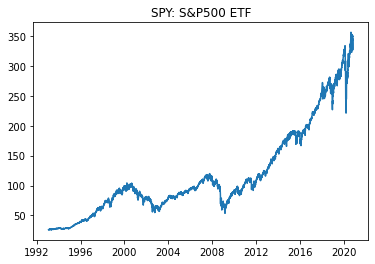

In [78]:
plt.plot(df['Date'], df['Close']);
plt.title("SPY: S&P500 ETF");

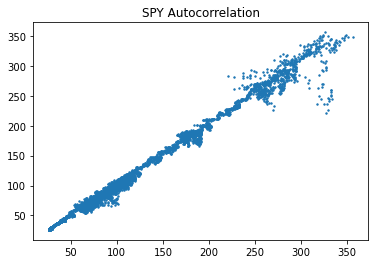

In [79]:
plt.scatter(df['Close'][:-30], df['Close'][30:], s = 2);
plt.title("SPY Autocorrelation");

In [80]:
def auto_corr(series, lag):
    corr, p_val = ss.pearsonr(series[:-lag], series[lag:])
    return corr, p_val

In [81]:
corrs = []
pvals = []
rng = np.arange(1,5001)

for i in rng:
    c, p = auto_corr(df['Close'], i)
    corrs.append(c)
    pvals.append(p)

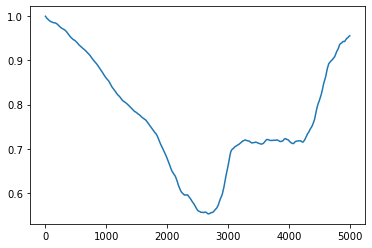

In [82]:
plt.plot(rng, corrs);

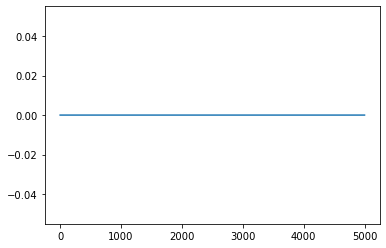

In [83]:
plt.plot(rng, pvals);

In [84]:
corrs = []
rng = np.arange(1,5001)

for i in rng:
    c = df['Close'].autocorr(i)
    corrs.append(c)

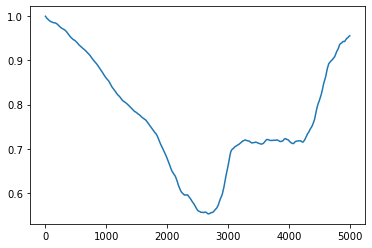

In [85]:
plt.plot(rng, corrs);

In [86]:
df["Percent"] = df['Close'].pct_change()

In [87]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Percent
Date,,,,,,,,,
1993-01-29,26.098207,26.098207,25.968366,26.079659,1003200,0.0,0,1993-01-29,NaN
1993-02-01,26.098205,26.265144,26.098205,26.265144,480500,0.0,0,1993-02-01,0.007112
1993-02-02,26.246586,26.339331,26.190940,26.320782,201300,0.0,0,1993-02-02,0.002118
1993-02-03,26.357880,26.617563,26.339331,26.599014,529400,0.0,0,1993-02-03,0.010571
1993-02-04,26.691763,26.765958,26.394982,26.710312,531500,0.0,0,1993-02-04,0.004184
...,...,...,...,...,...,...,...,...,...
2020-11-02,330.200012,332.359985,327.239990,330.200012,86068300,0.0,0,2020-11-02,0.011208
2020-11-03,333.690002,338.250000,330.290009,336.029999,93294200,0.0,0,2020-11-03,0.017656
2020-11-04,340.859985,347.940002,339.589996,343.540009,126959700,0.0,0,2020-11-04,0.022349


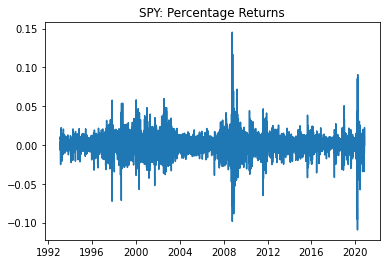

In [89]:
plt.plot(df['Percent']);
plt.title("SPY: Percentage Returns");

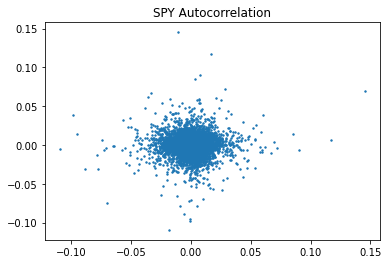

In [90]:
plt.scatter(df['Percent'][:-30], df['Percent'][30:], s = 2);
plt.title("SPY Autocorrelation");

In [94]:
corrs = []
pvals = []
rng = np.arange(1,5001)

for i in rng:
    c, p = auto_corr(df['Percent'][1:], i)
    corrs.append(c)
    pvals.append(p)

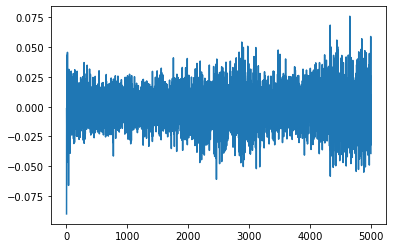

In [95]:
plt.plot(rng, corrs);

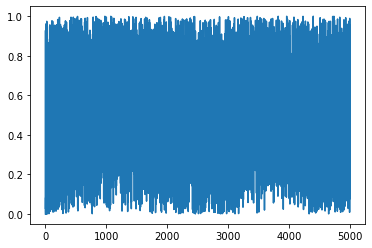

In [96]:
plt.plot(rng, pvals);